In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
df = pd.read_csv("../Data/FatherSonHeights/pearson.tsv", sep = '\t')
df.columns = ["Father's Height (inches)", "Son's Height (inches)"]

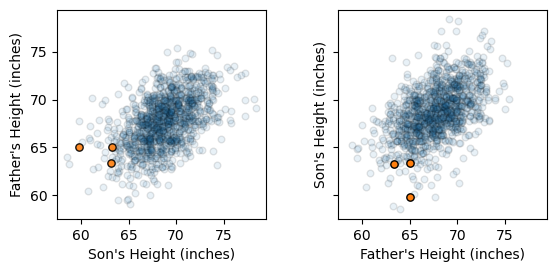

In [3]:
dad = df["Father's Height (inches)"].tail(-3)
son = df["Son's Height (inches)"].tail(-3)

dad1 = df["Father's Height (inches)"].head(3)
son1 = df["Son's Height (inches)"].head(3)


fig, axs = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (6,2.8))

ax = axs[0]
ax.set_aspect(1)
ax.scatter(son, dad, alpha = .1, ec = 'black', s = 23)
ax.scatter(son1, dad1, alpha = .9,ec = 'black', s = 28, fc = 'C1')
ax.set_ylabel("Father's Height (inches)")
ax.set_xlabel("Son's Height (inches)")

ax = axs[1]
ax.set_aspect(1)
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.scatter(dad1, son1, alpha = 1, ec = 'black', s = 28, fc = 'C1')

ax.set_xlabel("Father's Height (inches)")
ax.set_ylabel("Son's Height (inches)")

plt.tight_layout()
plt.savefig('../book/images/fathersonscatter.svg', transparent = True)

# Correlation

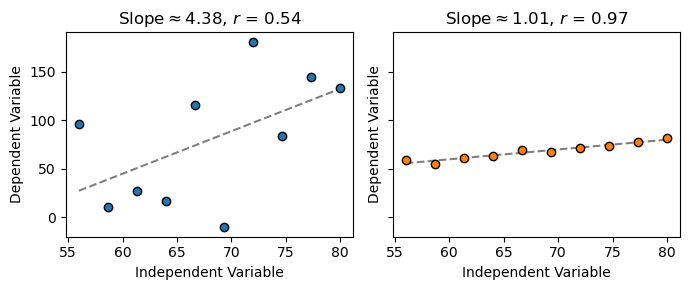

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
x1 = np.linspace(56, 80, n)

y1 = 5*x1 + np.random.normal(0, 44, size=len(x1)) - 256
y2 = x1 + np.random.normal(0, 2, size=len(x1))

r5 = np.corrcoef(x1, y1)[0][1]
r1 = np.corrcoef(x1, y2)[0][1]

coefficients1 = np.polyfit(x1, y1, 1)
polynomial1 = np.poly1d(coefficients1)

coefficients2 = np.polyfit(x1, y2, 1)
polynomial2 = np.poly1d(coefficients2)

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 3))

ax = axs[0]
ax.scatter(x1, y1, fc='C0', ec='black')
ax.set_title(fr"Slope$\approx${coefficients1[0]:.2f}, $r$ = {r5:.2f}")
ax.plot(x1, polynomial1(x1), ls='dashed', color='gray', zorder=-10)

ax = axs[1]
ax.scatter(x1, y2, fc='C1', ec='black')
ax.set_title(fr"Slope$\approx${coefficients2[0]:.2f}, $r$ = {r1:.2f}")
ax.plot(x1, polynomial2(x1), ls='dashed', color='gray', zorder=-10)

for ax in axs:
    ax.set_xlabel("Independent Variable")
    ax.set_ylabel('Dependent Variable')

plt.tight_layout()
plt.savefig("../book/images/slopecorrcomparison.svg", transparent = True)

plt.show()


# Averages

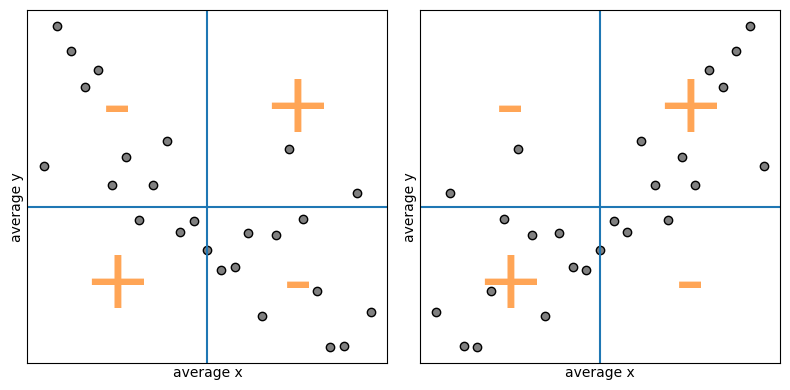

In [5]:
x = np.linspace(0, 10, 25)

y_neg = -x + np.random.normal(0, 3, size = len(x))
#y_pos = x + np.random.normal(size = len(x))


fig, axs = plt.subplots(1, 2, figsize = (8,4))

# negative
ax = axs[0]
ax.scatter(x,y_neg, facecolor = 'gray', ec = 'black')
ax.axvline(np.mean(x))
ax.axhline(np.mean(y_neg))

xlim = ax.get_xlim()
ylim = ax.get_ylim()
x_ = np.mean([np.mean(x), xlim[1]])
y_ = np.mean([np.mean(y_neg), ylim[1]])

x_low = np.mean([np.mean(x), xlim[0]])
y_low = np.mean([np.mean(y_neg), ylim[0]])


ax.text(x_, y_,
       s = '+',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.text(x_low, y_low,
       s = '+',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.text(x_, y_low,
       s = '-',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.text(x_low, y_,
       s = '-',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xticks([np.mean(x)])
ax.set_xticklabels(['average x'], rotation = 0, ha = 'center', va = 'center')


 # positive panel
ax = axs[1]
ax.scatter(-x,y_neg, facecolor = 'gray', ec = 'black')
ax.axvline(np.mean(-x))
ax.axhline(np.mean(y_neg))

xlim = ax.get_xlim()
ylim = ax.get_ylim()
x_ = np.mean([np.mean(-x), xlim[1]])
y_ = np.mean([np.mean(y_neg), ylim[1]])

x_low = np.mean([np.mean(-x), xlim[0]])
y_low = np.mean([np.mean(y_neg), ylim[0]])


ax.text(x_, y_,
       s = '+',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
#ax.text(x_, np.mean(y_neg),
#       s = 'average $y$',
#       ha = 'center',
#       va = 'top',
#       size = 12,
#       color = 'gray')

ax.text(x_low, y_low,
       s = '+',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.text(x_, y_low,
       s = '-',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.text(x_low, y_,
       s = '-',
       ha = 'center',
       va = 'center',
       size = 60,
       color = 'C1',
       alpha = 0.7,
       weight = 100)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xticks([np.mean(-x)])
ax.set_xticklabels(['average x'], rotation = 0, ha = 'center', va = 'center')

for ax in axs:
    ax.set_yticks([np.mean(y_neg)])
    ax.set_yticklabels(['average y'], rotation = 90, ha = 'center', va = 'center')
    ax.tick_params(axis='both', which='major', length=4, width = 0)
    
plt.tight_layout()
plt.savefig("../book/images/correlationQuadrants.svg", transparent = True)

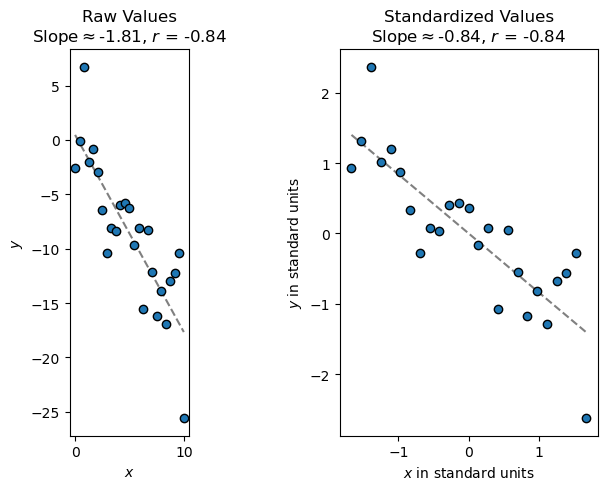

In [6]:
#x, y_neg

y_neg = -2*x + np.random.normal(0, 4, size = len(x))

x_std = (x - np.mean(x))/np.std(x, ddof = 0)
y_std = (y_neg - np.mean(y_neg))/np.std(y_neg, ddof = 0)


r_raw = np.corrcoef(x, y_neg)[0][1]
r = np.corrcoef(x_std, y_std)[0][1]

coefficients = np.polyfit(x_std, y_std, 1)
polynomial = np.poly1d(coefficients)

coefficients_raw = np.polyfit(x, y_neg, 1)
polynomial_raw = np.poly1d(coefficients_raw)

fig, axs = plt.subplots(1, 2, figsize=(7, 5))


ax = axs[0]
ax.scatter(x, y_neg, fc='C0', ec='black')
ax.set_title('Raw Values'+ "\n" + fr"Slope$\approx${coefficients_raw[0]:.2f}, $r$ = {r_raw:.2f}")
ax.plot(x, polynomial_raw(x), ls='dashed', color='gray', zorder=-10)
ax.set_aspect(1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")


ax = axs[1]
ax.scatter(x_std, y_std, fc='C0', ec='black')
ax.set_title( 'Standardized Values'+ "\n" + fr"Slope$\approx${coefficients[0]:.2f}, $r$ = {r:.2f}")
ax.plot(x_std, polynomial(x_std), ls='dashed', color='gray', zorder=-10)
ax.set_aspect(1)
ax.set_xlabel("$x$ in standard units")
ax.set_ylabel("$y$ in standard units")

plt.tight_layout()
plt.savefig("../book/images/rawStandardizedCorr.svg", transparent = True)

#plt.suptitle('')

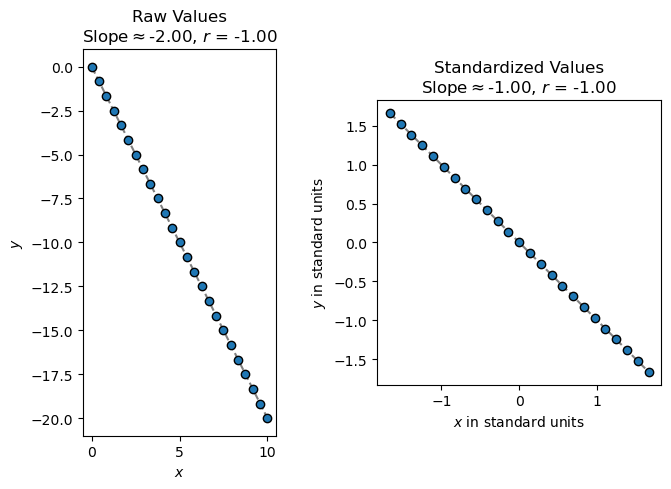

In [7]:
#x, y_neg

y_neg = -2*x  #+ np.random.normal(0, 1, size = len(x))

x_std = (x - np.mean(x))/np.std(x, ddof = 0)
y_std = (y_neg - np.mean(y_neg))/np.std(y_neg, ddof = 0)


r_raw = np.corrcoef(x, y_neg)[0][1]
r = np.corrcoef(x_std, y_std)[0][1]

coefficients = np.polyfit(x_std, y_std, 1)
polynomial = np.poly1d(coefficients)

coefficients_raw = np.polyfit(x, y_neg, 1)
polynomial_raw = np.poly1d(coefficients_raw)

fig, axs = plt.subplots(1, 2, figsize=(7, 5))


ax = axs[0]
ax.scatter(x, y_neg, fc='C0', ec='black')
ax.set_title('Raw Values'+ "\n" + fr"Slope$\approx${coefficients_raw[0]:.2f}, $r$ = {r_raw:.2f}")
ax.plot(x, polynomial_raw(x), ls='dashed', color='gray', zorder=-10)
ax.set_aspect(1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")


ax = axs[1]
ax.scatter(x_std, y_std, fc='C0', ec='black')
ax.set_title( 'Standardized Values'+ "\n" + fr"Slope$\approx${coefficients[0]:.2f}, $r$ = {r:.2f}")
ax.plot(x_std, polynomial(x_std), ls='dashed', color='gray', zorder=-10)
ax.set_aspect(1)
ax.set_xlabel("$x$ in standard units")
ax.set_ylabel("$y$ in standard units")

plt.tight_layout()
plt.savefig("../book/images/rawStandardizedCorrSquare.svg", transparent = True)

#plt.suptitle('')


# for later 

The coefficient $r$ is closely related to how an increase in one standard unit in $x$ predicts a change in $y$ in standard units. 


```{figure} images/rawStandardizedCorrSquare.svg
:width: 80%
:name: rawStandardizedCorr

..
```
d

```{figure} images/rawStandardizedCorr.svg
:width: 80%
:name: rawStandardizedCorr

..
```